In [65]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [69]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [70]:
df = pd.read_csv(r"data_understanding_output.csv",skipinitialspace=True)

In [71]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

word    object
PoS     object
dtype: object

In [72]:
df_train = df.drop(['word','PoS', 'polysemy'], axis=1)
df_train.dtypes

length                             int64
arousal                          float64
valence                          float64
dominance                        float64
concreteness                     float64
imageability                     float64
familiarity                      float64
aoa                              float64
semsize                          float64
gender                           float64
log_freq                         float64
number_of_meanings                 int64
avg_variance_between_meanings    float64
sentiment                        float64
dtype: object

In [73]:
df_train.columns

Index(['length', 'arousal', 'valence', 'dominance', 'concreteness',
       'imageability', 'familiarity', 'aoa', 'semsize', 'gender', 'log_freq',
       'number_of_meanings', 'avg_variance_between_meanings', 'sentiment'],
      dtype='object')

In [74]:
from sklearn import preprocessing

In [75]:
import warnings
warnings.filterwarnings('ignore')


In [76]:
cols = [col for col in df_train.columns]
X = df[cols].values

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

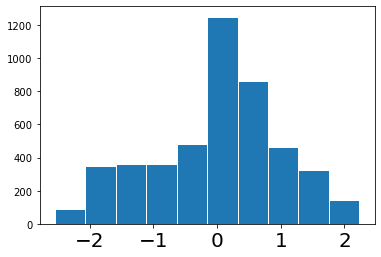

In [77]:
plt.hist(X_scal[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

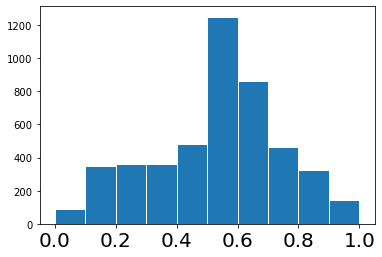

In [78]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.hist(X_minmax[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

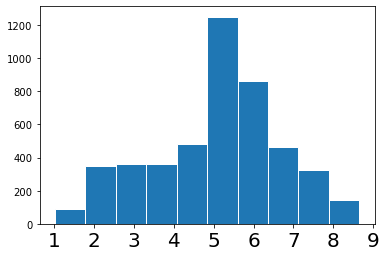

In [79]:
plt.hist(X[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [80]:
kmeans = KMeans( n_clusters=5, n_init=20, max_iter=100 )
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=5, n_init=20)

In [81]:
kmeans.labels_

array([1, 1, 3, ..., 1, 4, 3], dtype=int32)

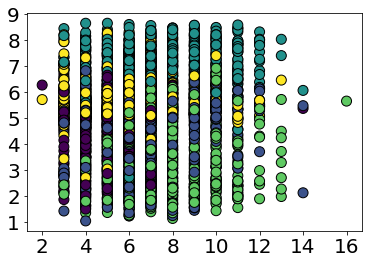

In [82]:
plt.scatter( X[:,0], X[:,2], s=100, edgecolor='black', c= kmeans.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [83]:
kmeans.cluster_centers_

array([[0.24774296, 0.37477768, 0.50233377, 0.45980293, 0.40895045,
        0.41532869, 0.77780073, 0.40045378, 0.49035899, 0.51045584,
        0.6357309 , 0.06790582, 0.0354057 , 0.45910781],
       [0.31990168, 0.36550004, 0.46358805, 0.44567841, 0.74178906,
        0.71860821, 0.5531402 , 0.62202692, 0.46863446, 0.59185734,
        0.43855416, 0.02064651, 0.01506839, 0.48852972],
       [0.37804878, 0.64259193, 0.79636194, 0.64671193, 0.29768385,
        0.39006372, 0.75033082, 0.55352304, 0.66183149, 0.43941108,
        0.55715051, 0.01355014, 0.00775451, 0.70663957],
       [0.36820513, 0.40331222, 0.33542972, 0.36929681, 0.30576928,
        0.32049843, 0.55500378, 0.71386149, 0.54925161, 0.55404283,
        0.4098773 , 0.00574359, 0.0038904 , 0.37487179],
       [0.25727348, 0.4030152 , 0.60590133, 0.51897498, 0.85486381,
        0.88265133, 0.79263858, 0.2961046 , 0.38728776, 0.48771696,
        0.55524623, 0.06982544, 0.04498497, 0.50415628]])

In [84]:
centers = kmeans.cluster_centers_

In [85]:
centers = scaler.inverse_transform(centers)

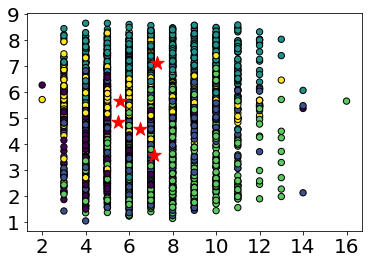

In [86]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], c='red', marker='*', s=200 )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

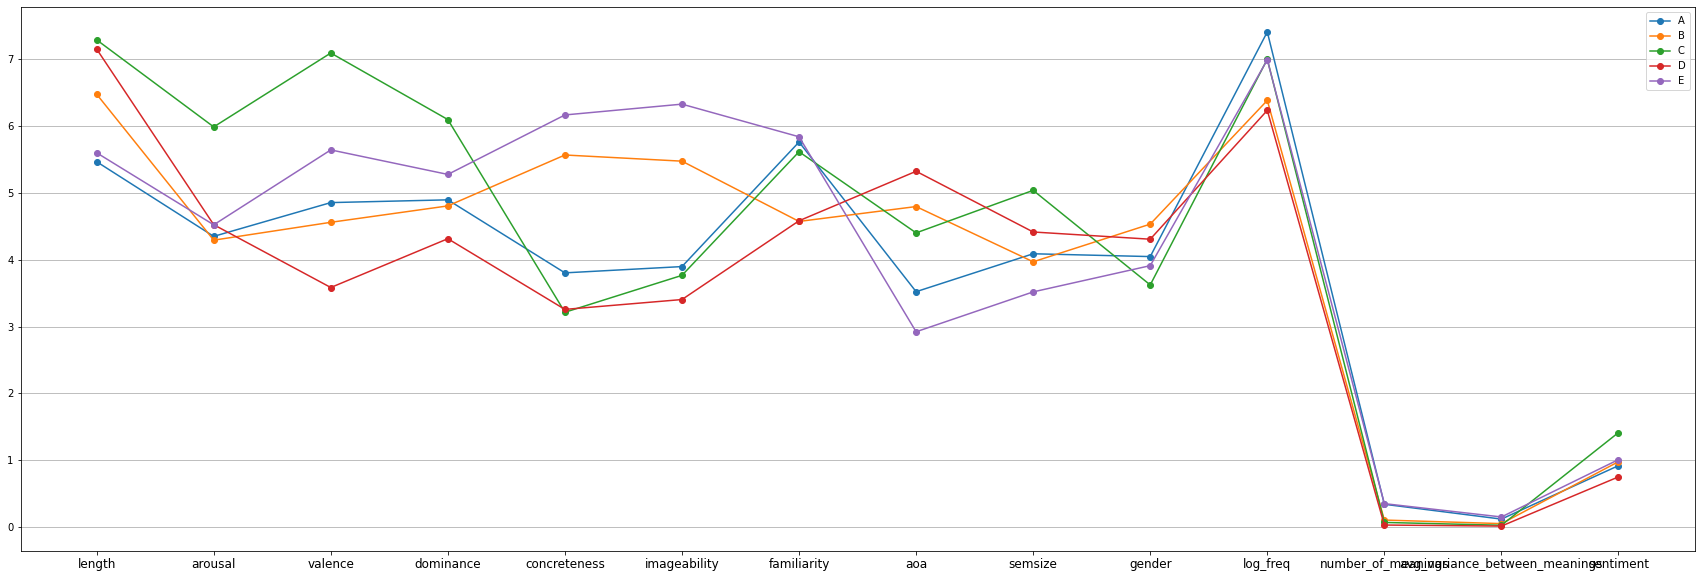

In [87]:
plt.figure(figsize=(30, 10))

clust_name = ['A', 'B', 'C','D','E']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=12)
plt.yticks(fontsize=10)

plt.legend(fontsize=10, loc='best')
plt.grid(axis='y')

[]

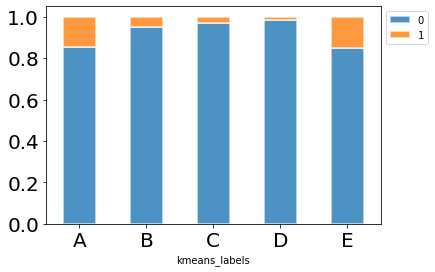

In [88]:
df_train['kmeans_labels'] = kmeans.labels_

bar_pl = df['polysemy'].groupby(df_train['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [89]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 807,  959,  738,  975, 1203]))

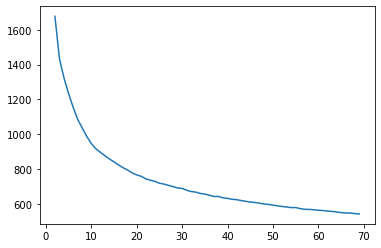

In [90]:
# kmeans
sse_list = list()
max_k = 70
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [91]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 542.915772834112
Silhouette 0.10711407702143981


In [92]:
train_data = df_train.values

In [93]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('centers', kmeans.cluster_centers_)
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))



centers [[5.41886792e+00 4.01988113e+00 4.85869057e+00 4.94553585e+00
  5.62212642e+00 5.45361509e+00 4.35382075e+00 4.77990943e+00
  3.57875849e+00 4.37789245e+00 6.35669679e+00 1.43396226e-01
  6.56147311e-02 9.88679245e-01 1.00000000e+00]
 [8.77777778e+00 4.43674383e+00 4.98188272e+00 4.94197222e+00
  5.51563889e+00 5.37968210e+00 4.81826235e+00 5.02720988e+00
  4.45618827e+00 4.61004012e+00 6.53121461e+00 1.85185185e-02
  6.13930418e-03 9.93827160e-01 9.25925926e-01]
 [6.05295316e+00 4.32059267e+00 4.26284929e+00 4.66414257e+00
  3.23259878e+00 3.20585540e+00 4.21149084e+00 5.53657434e+00
  4.10513849e+00 4.21360285e+00 6.21104787e+00 5.09164969e-02
  1.84620410e-02 8.79837067e-01 2.98574338e+00]
 [4.54615385e+00 4.37016026e+00 5.45365256e+00 5.24994615e+00
  6.15451538e+00 6.30124615e+00 5.87659872e+00 2.79186026e+00
  3.35558462e+00 4.02485256e+00 7.12648581e+00 5.00000000e-01
  2.14574570e-01 1.00641026e+00 4.00000000e+00]
 [5.94407159e+00 6.04607830e+00 7.11790604e+00 6.1009015

In [94]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append( kmeans.inertia_ )

In [97]:
df_clusters = df_train
df_clusters['Labels'] = kmeans.labels_

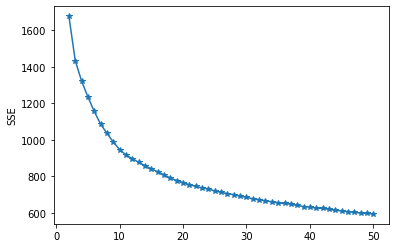

In [98]:
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

In [99]:
df_clusters[df_clusters['Labels']==3].describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,log_freq,number_of_meanings,avg_variance_between_meanings,sentiment,kmeans_labels,Labels
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.000000,74.0
mean,5.054054,3.953419,2.916865,4.096122,3.140527,3.668122,5.853662,3.295054,3.922122,4.237176,6.886377,0.094595,0.031916,0.0,1.094595,3.0
std,1.248472,0.835338,0.829906,0.732645,0.493408,0.642375,0.502796,0.707900,0.685038,0.523316,0.548111,0.473081,0.183870,0.0,1.454035,0.0
min,3.000000,2.057000,1.618000,2.600000,2.273000,2.400000,4.576000,1.588000,1.758000,2.861000,5.526003,0.000000,0.000000,0.0,0.000000,3.0
25%,4.000000,3.388500,2.278250,3.500750,2.729000,3.321500,5.534750,2.785750,3.480500,3.946750,6.571895,0.000000,0.000000,0.0,0.000000,3.0
50%,5.000000,4.059000,2.730000,4.088000,3.060000,3.567500,5.910500,3.288000,4.031500,4.257500,6.863240,0.000000,0.000000,0.0,0.000000,3.0
75%,6.000000,4.478000,3.470000,4.605250,3.477500,4.087500,6.251750,3.934250,4.448750,4.599500,7.194281,0.000000,0.000000,0.0,3.000000,3.0
max,8.000000,5.606000,5.303000,6.029000,4.177000,5.177000,6.667000,4.800000,5.455000,5.457000,8.046221,3.000000,1.412515,0.0,3.000000,3.0


In [100]:
dbscan = DBSCAN( eps=0.3, min_samples=5)
dbscan.fit(X_minmax)

DBSCAN(eps=0.3)

In [106]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [107]:
# density based clustering
print ('dbscan')

dbscan = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
dbscan.fit(X_minmax)



print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan
labels {-1: 4682, 0: 0}
silhouette -0.18756091351363047


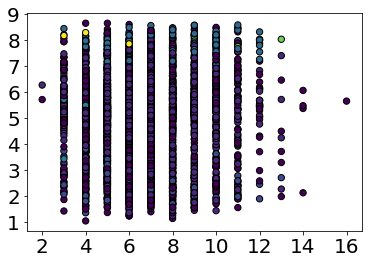

In [108]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

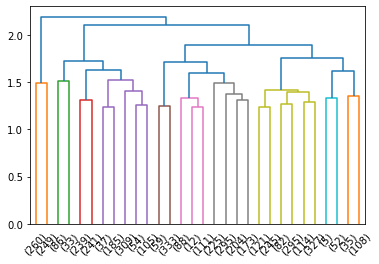

In [109]:
#hierarchical
data_dist = pdist(X_minmax, metric='euclidean')
data_link = linkage(data_dist, method='complete')

res = dendrogram(data_link, truncate_mode='lastp')

In [110]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hier.fit(X_minmax)

AgglomerativeClustering(linkage='single')

In [111]:
hier.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [116]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [117]:
print ('ward')
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, ward.labels_))

ward
labels {0: 981, 1: 931, 2: 739, 3: 990, 4: 387, 5: 654}
silhouette 0.18769835690232398


In [119]:
print ('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage
labels {0: 4677, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}
silhouette 0.03694717754398855


In [120]:
print ('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print( 'labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))

complete linkage
labels {0: 1107, 1: 1518, 2: 1528, 3: 293, 4: 108, 5: 128}
silhouette -0.025477337799990972


In [122]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram